Script that shows some example and tests for psf_image_conv.

In [1]:
%run 'psf_image_conv.ipynb'

## Plotting a profile

theta (radians):  angular distance from center of profile <br>
fwhm (radians):  full-width-half-max for the profile -- optimally 3 arcsec for Dragonfly

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


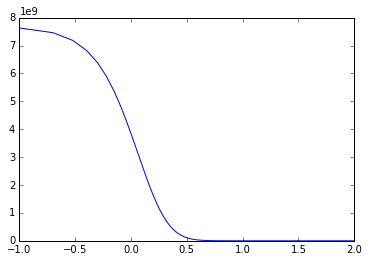

In [2]:
theta = np.arange(0,100,0.1)
fwhm = 2./206265.
flux = moffat(theta/206265, fwhm, beta=4)

plt.plot(np.log10(theta), flux)

Now plot a profile again, but with the axes in magnitudes and labelled.

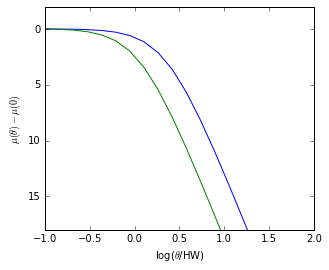

In [3]:
theta = 10.0**np.linspace(-1.0, 2.0, 20)
fwhm = 2
flux = moffat(theta, fwhm, beta=4)
mags = 2.5*np.log10(flux[0])-2.5*np.log10(flux)  # One moffat

plt.plot(np.log10(theta), mags)

theta = 10.0**np.linspace(-1.0, 2.0, 20)
fwhm = 1
flux = moffat(theta, fwhm, beta=4)
mags = 2.5*np.log10(flux[0])-2.5*np.log10(flux)  # One moffat

plt.plot(np.log10(theta), mags)

# Ignore Unicode equal comparison warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.gca().set_ylim(ymin=-2)
    plt.gca().set_ylim(ymax=18)
    xl0,xl1 = plt.gca().get_xlim()
    yl0,yl1 = plt.gca().get_ylim()
    plt.gca().set_aspect(0.83*(xl1-xl0)/(yl1-yl0))
    plt.gca().set_xlabel(r'log($\theta$/HW)')
    plt.gca().set_ylabel(r'$\mu(\theta) - \mu(0)$')
    plt.gca().invert_yaxis()

## Image convolution

### Picking values
At a comoving distance of 20 Mpc, the redshift is about z = 0.005 (from Ned's cosmology calculator).<br>
The Dragonfly pixels are 2.8 arcsec, and if we have 21 of them across, that's 2.8x21 arcsec = 60 arcsec, and at a scale of 0.104 kpc/", the boxlength is 0.104 x 60 kpc = 6.1 kpc.<br>
A normal FWHM for Dragonfly data is about 3 arcsec.

In [4]:
z = 0.005
kpc_to_arcsec_20Mpcaway = 0.104 #kpc/arcsec ; from 'Ned's cosmology calculator'
numpix = 2000 # approx number of pixels for Dragonfly CCD
angularpixsize_dragonfly = 2.8 #arcsec
boxlength = angularpixsize_dragonfly * numpix * kpc_to_arcsec_20Mpcaway / 1000. # Mpc
fwhm = 3.0*arcsec

print 'Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: %s radians.'%fwhm
print 'For %s pixels a side, each of angular size %s arcsec, at a distance of 20 Mpc, the length along the side is %s Mpc.'%(numpix,angularpixsize_dragonfly,boxlength)

Dont forget to put the FWHM into radians! FWHM of 3 arcsec is: 1.45444104333e-05 radians.
For 2000 pixels a side, each of angular size 2.8 arcsec, at a distance of 20 Mpc, the length along the side is 0.5824 Mpc.


Using a somewhat delta function to test the convolution.

In [12]:
img = np.zeros((20,20))
numpix = img.shape[0]  
img[numpix/2,numpix/2] = 100  #img[numpix/2-2:numpix/2+2,numpix/2-2:numpix/2+2] = 1

boxlength = (angularpixsize_dragonfly*numpix*kpc_to_arcsec_20Mpcaway) / 1000. # Mpc

integral before convolution: 100.0
STARTING convolution...
img shape: (20,20), boxlength: 0.005824 Mpc,numpix: 20,z: 0.005,kernel: 2MoffatAureole,fwhm: 1.45444104333e-05 arcsec. 

af: 0.02,mf: 0.98, m1f: 0.8,beta1: 7.0,beta2: 2.0,d0: 50.0
 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
 Calculting PSF.

 Fourier transforming PSF.



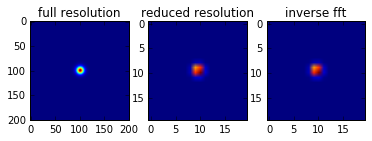

sum of inverse fft psf: 1.0
20
200
200


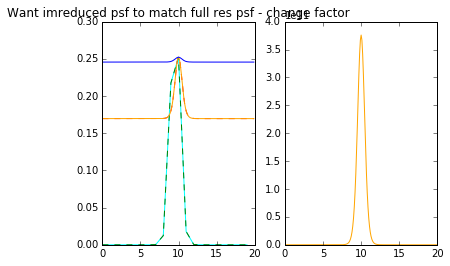

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
 Calculting PSF.

 Fourier transforming PSF.



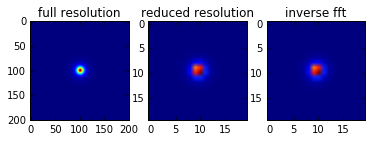

sum of inverse fft psf: 1.0
20
200
200


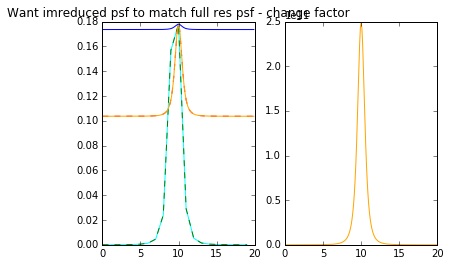

 FINISHED generate_abr_fftkernel.



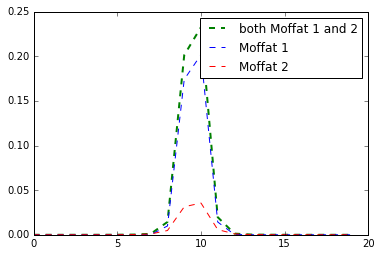

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

FINISHED convolution.
integral after convolution: 100.0


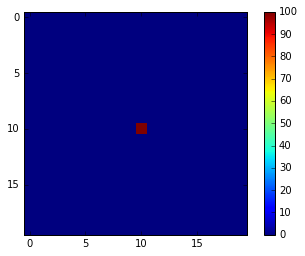

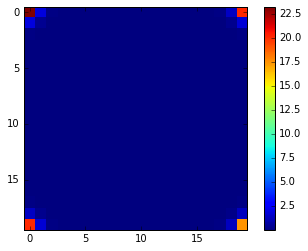

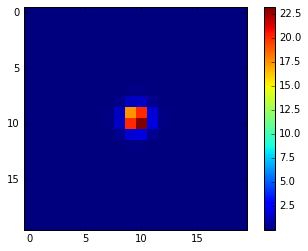

In [13]:
print 'integral before convolution: %s'%np.sum(img)

convolved2MoffatAureole = conv_image_abr(img,boxlength,numpix,z,'2MoffatAureole',fwhm,debug=False,plotchecks=True)

print 'integral after convolution: %s'%np.sum(convolved2MoffatAureole)

plt.imshow(img,interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(convolved2MoffatAureole,interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.fft.fftshift(convolved2MoffatAureole),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

integral before convolution: 100.0
STARTING convolution...
img shape: (20,20), boxlength: 0.005824 Mpc,numpix: 20,z: 0.005,kernel: 2Moffat,fwhm: 1.45444104333e-05 arcsec. 

 Generating the 2Moffat or 2MoffatAureole kernel...

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 7.0...
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

 STARTING generate_abr_fftkernel for fwhm 1.45444104333e-05, beta 2.0...
 Calculting PSF.

 Fourier transforming PSF.

 FINISHED generate_abr_fftkernel.

FINISHED convolution.
integral after convolution: 100.0


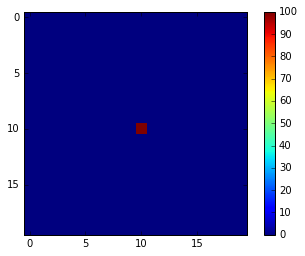

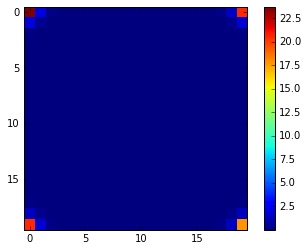

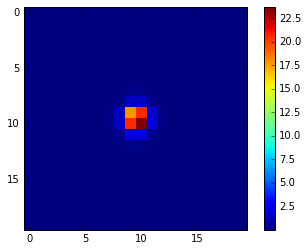

In [14]:
print 'integral before convolution: %s'%np.sum(img)

convolved2Moffat = conv_image_abr(img,boxlength,numpix,z,'2Moffat',fwhm,debug=False)

print 'integral after convolution: %s'%np.sum(convolved2Moffat)

plt.imshow(img,interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(convolved2Moffat,interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(np.fft.fftshift(convolved2Moffat),interpolation='nearest') #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()

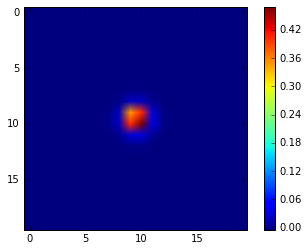

In [15]:
plt.imshow(np.fft.fftshift(convolved2Moffat)-np.fft.fftshift(convolved2MoffatAureole)) #https://dsp.stackexchange.com/questions/47249/result-of-inverse-fft-is-sometimes-shifted-in-real-space
plt.colorbar()
plt.show()